<a href="https://colab.research.google.com/github/lukedup/CECASEM/blob/main/trata_facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Importar datos

In [2]:
url = 'https://raw.githubusercontent.com/lukedup/CECASEM/main/trata_y_trafico/trato_y_trafico%20-%20Sheet1.csv'

In [3]:
df_datos = pd.read_csv(
    filepath_or_buffer=url,
    parse_dates=['Fecha']
)

# Limpieza de datos

In [4]:
df_datos['Sexo'] = df_datos['Sexo'].str.strip()

In [5]:
df_datos['Nacionalidad'] = df_datos['Nacionalidad'].str.strip()

# EDA

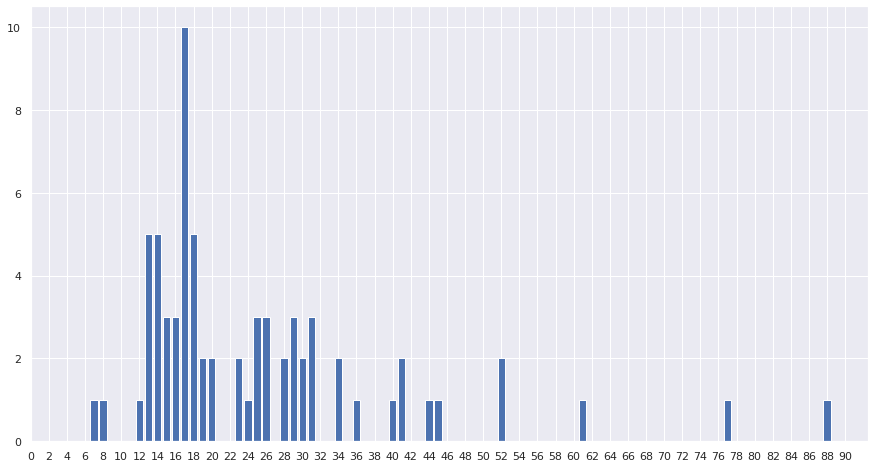

In [6]:
edad = df_datos['Edad'].value_counts().reset_index()

plt.figure(figsize=(15, 8))
plt.bar(x=edad['index'], height=edad['Edad'])
plt.xticks(np.arange(0, 91, 2))
plt.show()

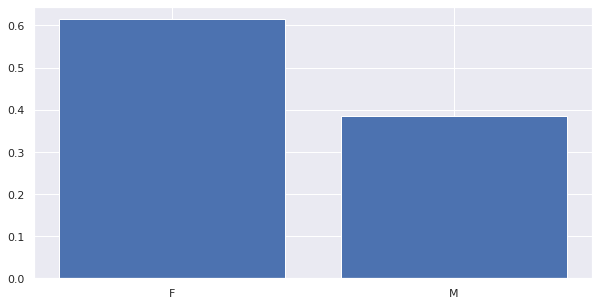

In [7]:
sexo = df_datos['Sexo'].value_counts(
    normalize=True
).reset_index()

plt.figure(figsize=(10, 5))
plt.bar(x=sexo['index'], height=sexo['Sexo'])
plt.show()

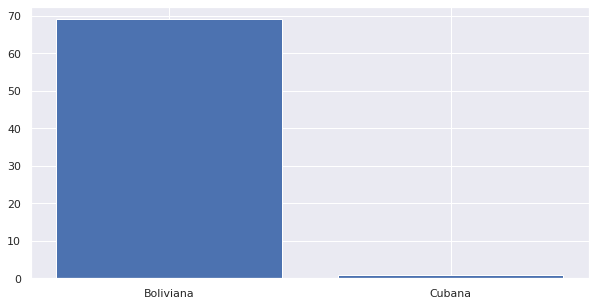

In [8]:
nacionalidad = df_datos['Nacionalidad'].value_counts().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(x=nacionalidad['index'], height=nacionalidad['Nacionalidad'])
plt.show()

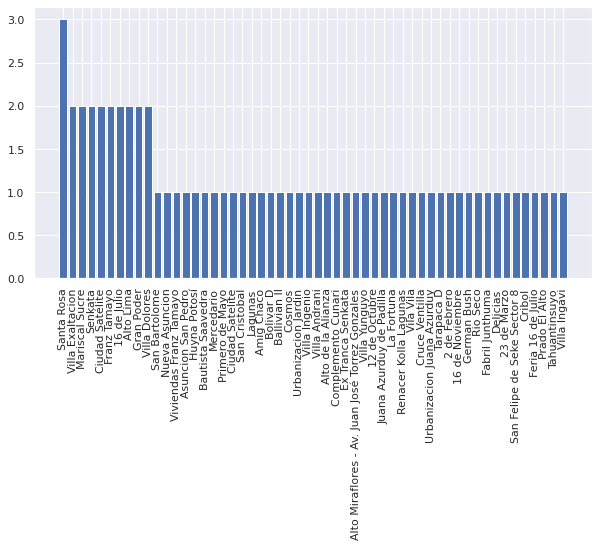

In [9]:
domicilio = df_datos['Domicilio'].str.replace(
    ' - El Alto',
    ''
).str.replace(
    'Zona ',
    ''
).str.strip().value_counts().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(x=domicilio['index'], height=domicilio['Domicilio'])
plt.xticks(rotation=90)
plt.show()

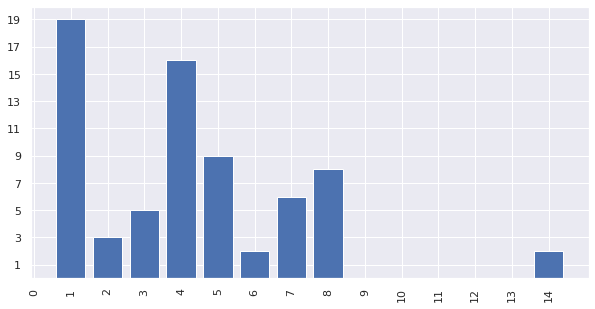

In [10]:
distrito = df_datos['Distrito'].value_counts().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(x=distrito['index'], height=distrito['Distrito'])
plt.xticks(rotation=90)
plt.xticks(np.arange(0, 15))
plt.yticks(np.arange(1, 21, 2))
plt.show()

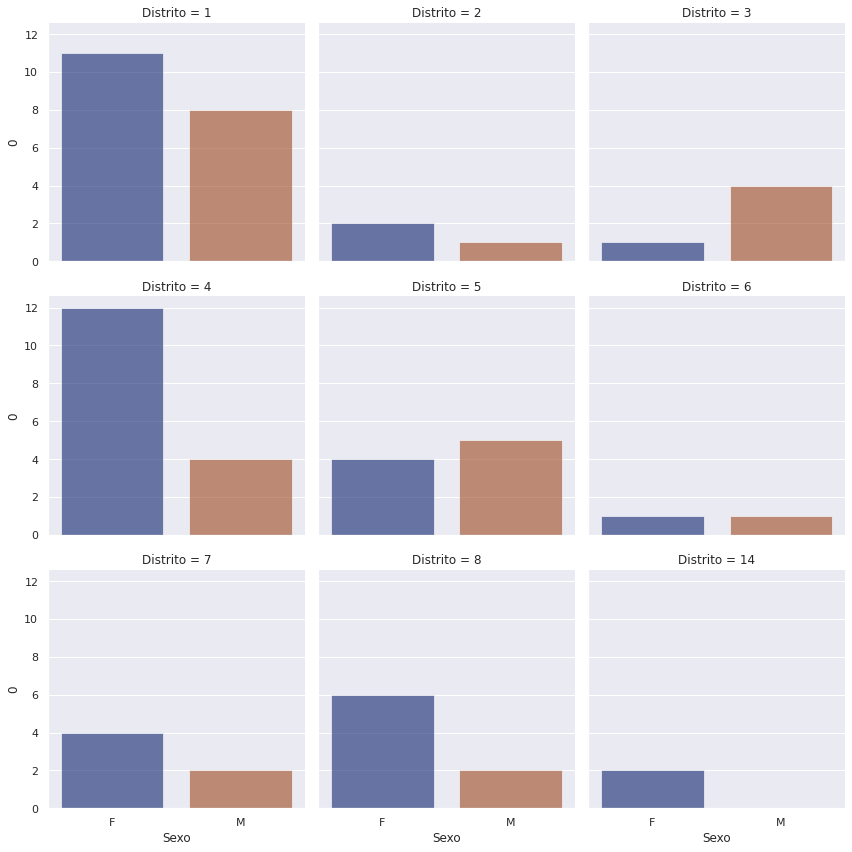

In [11]:
x = df_datos.value_counts(['Distrito', 'Sexo']).reset_index()

sns.catplot(
    data=x, kind="bar",
    x="Sexo", y=0, col='Distrito', col_wrap=3,
    ci=None, palette="dark", 
    alpha=.6, height=4
)
plt.show()

In [13]:
y = df_datos.value_counts(['Distrito', 'Edad']).reset_index()

sns.catplot(
    data=y, kind="bar",
    x="Edad", y=0, col='Distrito', col_wrap=3,
    ci=None, palette="dark", 
    alpha=.6, height=4, aspect=1.5
)
plt.show()

ValueError: ignored

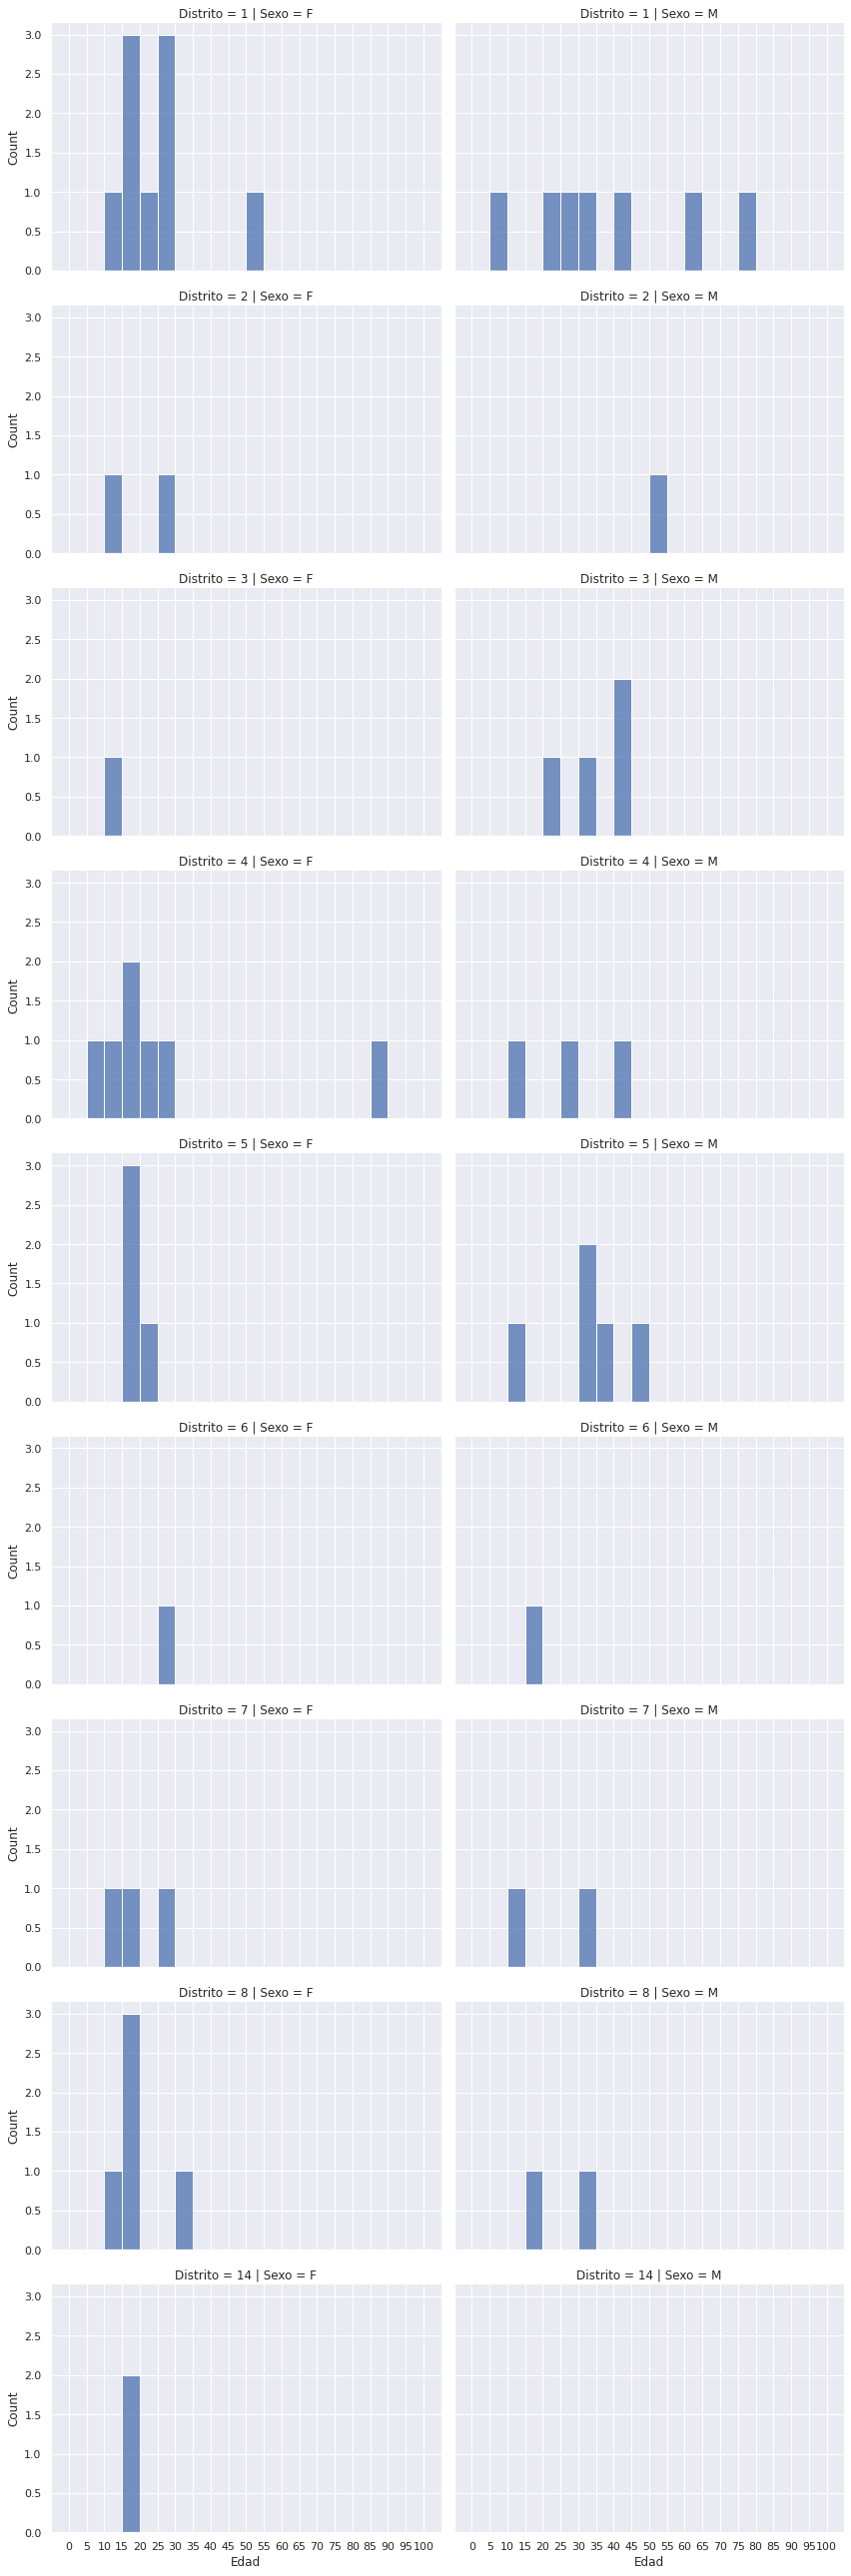

In [68]:
y = df_datos.value_counts(['Distrito','Sexo', 'Edad']).reset_index()

g = sns.FacetGrid(
    y, col='Sexo',
    height=4, aspect=1.5,
    row='Distrito'
)

g.map(
    sns.histplot, 'Edad', 
    # discrete=True,
    bins=np.arange(0, 101, 5),
)

plt.xticks(np.arange(0, 101,5))
plt.show()